In [1]:
%pip install tensorflow
%pip install keras


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import re
import json
import nltk
import string
import random
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Model


nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khalf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# read json file
with open('/content/intents.json', 'r', encoding='utf-8') as content:
    chatbot = json.load(content)

#convert to dataframe
data = pd.DataFrame(chatbot['intents'])

print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/intents.json'

In [ ]:
#dictionary
dictionary = {"tag": [], "patterns": [], "responses": []}

#iterate trough the data
for i in range (len(data)):
  pattern = data[data.index==i]['patterns'].values[0]
  response = data[data.index==i]['responses'].values[0]
  tag = data[data.index==i]['tag'].values[0]
  for j in range (len(pattern)):
    dictionary['tag'].append(tag)
    dictionary['patterns'].append((pattern[j]))
    dictionary['responses'].append(response)

#showing the data
data = pd.DataFrame.from_dict(dictionary)
data

,tag,patterns,responses
0,qna 1,A,[Tujuan utama dari pembentukan Kitab Undang-Un...
1,qna 1,p,[Tujuan utama dari pembentukan Kitab Undang-Un...
2,qna 1,a,[Tujuan utama dari pembentukan Kitab Undang-Un...
3,qna 1,,[Tujuan utama dari pembentukan Kitab Undang-Un...
4,qna 1,t,[Tujuan utama dari pembentukan Kitab Undang-Un...
...,...,...,...
18599,qna 50,u,[Berikut merupakan beberapa kasus tindak pidan...
18600,qna 50,m,[Berikut merupakan beberapa kasus tindak pidan...
18601,qna 50,u,[Berikut merupakan beberapa kasus tindak pidan...
18602,qna 50,m,[Berikut merupakan beberapa kasus tindak pidan...


In [ ]:
with open('/content/questionVal.json', 'r', encoding='utf-8') as content:
    val_chatbot = json.load(content)
val_data = pd.DataFrame(val_chatbot['intents'])

print(val_data.head())

     tag                                           patterns  \
0  qna 1  [Apa tujuan utama dari pembentukan Kitab Undan...   
1  qna 2  [Apa yang dimaksud dengan Kitab Undang-Undang ...   
2  qna 3  [Bagaimana ruang lingkup berlakunya ketentuan ...   
3  qna 4  [Apa yang dimaksud dengan asas wilayah atau te...   
4  qna 5  [Bagaimana ketentuan Pasal 2 ayat (1) dan (2) ...   

                                           responses context  
0  [Tujuan utama dari pembentukan Kitab Undang-Un...      []  
1  [Kitab Undang-Undang Hukum Pidana (KUHP) adala...      []  
2  [Ketentuan peraturan Perundang-undangan hukum ...      []  
3  [Asas wilayah atau teritorial adalah asas hubu...      []  
4  [Hukum yang hidup dalam masyarakat yang terdap...      []  


In [ ]:
#dictionaries
dictionariez = {"tag":[], "patterns":[]}

for i in range (len(val_data)):
  pattern = val_data[val_data.index==i]['patterns'].values[0]
  tag = val_data[val_data.index==i]['tag'].values[0]
  for j in range (len(pattern)):
    dictionariez['tag'].append(tag)
    dictionariez['patterns'].append(pattern[j])

val_data = pd.DataFrame.from_dict(dictionariez)
val_data

,tag,patterns
0,qna 1,A
1,qna 1,p
2,qna 1,a
3,qna 1,
4,qna 1,t
...,...,...
4622,qna 50,h
4623,qna 50,u
4624,qna 50,s
4625,qna 50,u


In [ ]:
# Training
data['tag'].unique()

array(['qna 1', 'qna 2', 'qna 3', 'qna 4', 'qna 5', 'qna 6', 'qna 7',
       'qna 8', 'qna 9', 'qna 10', 'qna 11', 'qna 12', 'qna 13', 'qna 14',
       'qna 15', 'qna 16', 'qna 17', 'qna 18', 'qna 19', 'qna 20',
       'qna 21', 'qna 22', 'qna 23', 'qna 24', 'qna 25', 'qna 26',
       'qna 27', 'qna 28', 'qna 29', 'qna 30', 'qna 31', 'qna 32',
       'qna 33', 'qna 34', 'qna 35', 'qna 36', 'qna 37', 'qna 38',
       'qna 39', 'qna 40', 'qna 41', 'qna 42', 'qna 43', 'qna 44',
       'qna 45', 'qna 46', 'qna 47', 'qna 48', 'qna 49', 'qna 50'],
      dtype=object)

In [ ]:
#Tokenizing and Validation Patterns
with open('/content/dictionaries.json', 'r') as f:
  json_dict = json.load(f)

tokenizer_json = json_dict.keys()

tokenizer = Tokenizer(oov_token = '')
tokenizer.fit_on_texts(tokenizer_json)

word_index = tokenizer.word_index
print(len(word_index))

18727


In [ ]:
#shuffling data
data = shuffle(data)

val_data = shuffle(val_data)

In [ ]:
#encoding labels
label_encode = LabelEncoder()

tokenizer.fit_on_texts(data['patterns'])
tokenizer.fit_on_texts(val_data['patterns'])

#trainin sets
pattern_train = tokenizer.texts_to_sequences(data['patterns'])
x_train = pad_sequences(pattern_train, padding='post', maxlen=12, truncating='pre')
print("Training Input Shape : ", x_train.shape)
print(len(x_train[0]))

x_label = label_encode.fit_transform(data['tag'])
print("Training Label Shape : ", x_label.shape)
print("Num of classes: ", len(np.unique(x_label)))

Training Input Shape :  (282, 12)
12
Training Label Shape :  (282,)
Num of classes:  50


In [ ]:
#validation
pattern_val = tokenizer.texts_to_sequences(val_data['patterns'])
y_train = pad_sequences(pattern_val, padding='post', maxlen=12, truncating='pre')
print("Validation Input Shape : ", y_train.shape)
print(len(y_train[0]))

y_label = label_encode.fit_transform(val_data['tag'])
print("Validation Label Shape : ",y_label.shape)
print("Num of classes: ", len(np.unique(y_label)))


Validation Input Shape :  (71, 12)
12
Validation Label Shape :  (71,)
Num of classes:  50


In [ ]:
vocabulary = len(tokenizer.word_index)
print("Number unique word : ",vocabulary)
print("Output Length : ", label_encode.classes_.shape[0])


Number unique word :  18764
Output Length :  50


In [ ]:
word_dictionary = {item[0]: item[1] for item in tokenizer.word_index.items()}
with open('tokenizer_chatbot_dict.json', 'w') as json_file:
  json.dump(word_dictionary, json_file, indent=4)

In [ ]:

# Label encoding for 'tag' column in val_data
label_encoder = LabelEncoder()
label_encoder.fit(val_data['tag'])

# Convert numpy.int64 to native Python int
class_labels = label_encoder.classes_.tolist()
class_indices = label_encoder.transform(label_encoder.classes_).tolist()
label_mapping = {label: int(idx) for label, idx in zip(class_labels, class_indices)}

# Write the mapping dictionary to a JSON file
with open('label_decoder.json', 'w') as file:
    json.dump(label_mapping, file, indent=4)

In [ ]:
# !rm -f glove.6B.zip
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-06-27 17:45:35--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-27 17:45:35--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2024-06-27 17:48:14 (5.19 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

In [ ]:
glove_dir = "/content/glove.6B.100d.txt"
embeddings_index = {}
file_ = open(glove_dir, encoding='utf8')
for line in file_:
  arr = line.split()
  single_word = arr[0]
  w = np.asarray(arr[1:],dtype='float32')
  embeddings_index[single_word] = w
file_.close()
print(len(embeddings_index))

400000


In [ ]:
max = vocabulary + 1
word_index =tokenizer.word_index
embedding_mat = np.zeros((max, 100)).astype(object)
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_mat[i] = embedding_vector


In [ ]:
def chatbot_test():
    while True:
        user_input = input("User: ").lower()
        # Tokenize and pad the user input
        tokenized_input = tokenizer.texts_to_sequences([user_input])
        x_test = pad_sequences(tokenized_input, maxlen=x_train.shape[1])

        # Predict the response
        prediction = model.predict(x_test)[0]
        label = label_encode.inverse_transform([np.argmax(prediction)])[0]

        # Select a response based on the predicted label
        responses = data[data['tag'] == label]['responses'].values[0]
        print("Label:", label)
        print("Chatbot:", random.choice(responses))

        # Break the loop if the label is 'qna 1' or 'qna 2'
        if label == 'qna 1' or label == 'qna 2':
            break


In [ ]:
def plot_training_history(history):
    # Plotting training accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
    plt.legend(loc='lower right')
    plt.title('Accuracy')
    plt.ylim(0, 1.0)

    # Plotting training loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='orange')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='yellow')
    plt.legend(loc='upper right')
    plt.title('Loss')
    plt.ylim(0, 4.0)

    # Display the plots
    plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1])),
    tf.keras.layers.Embedding(input_dim=vocabulary+1, output_dim = 100, mask_zero=True,
                              weights=[embedding_mat], trainable=False),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.GRU(128, return_sequences=True, reset_after=False),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(128, return_sequences=False, reset_after=False),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dropout(0.2),


    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dense(len(np.unique(x_label)), activation='softmax')
])

model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 12, 100)           1876500   
                                                                 
 dropout (Dropout)           (None, 12, 100)           0         
                                                                 
 gru (GRU)                   (None, 12, 128)           87936     
                                                                 
 layer_normalization (Layer  (None, 12, 128)           256       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 12, 128)           0         
                                                                 
 gru_1 (GRU)                 (None, 128)               98688     
                                                        

In [ ]:
# Callback function to stop training when the accuracy is above 90%
# and validation accuracy above 90%
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.8:
            self.model.stop_training = True

In [ ]:

history = model.fit(x_train, x_label, validation_data=(y_train, y_label),
                    batch_size=32, epochs=1000, callbacks=[MyCallback()])


Epoch 1/1000
9/9 [==============================] - 8s 138ms/step - loss: 4.3680 - accuracy: 0.0532 - val_loss: 3.2154 - val_accuracy: 0.2113
Epoch 2/1000
9/9 [==============================] - 0s 52ms/step - loss: 3.6544 - accuracy: 0.0922 - val_loss: 2.5632 - val_accuracy: 0.4085
Epoch 3/1000
9/9 [==============================] - 0s 52ms/step - loss: 3.1087 - accuracy: 0.2340 - val_loss: 2.1175 - val_accuracy: 0.4507
Epoch 4/1000
9/9 [==============================] - 0s 55ms/step - loss: 2.8072 - accuracy: 0.2979 - val_loss: 1.7800 - val_accuracy: 0.5634
Epoch 5/1000
9/9 [==============================] - 0s 48ms/step - loss: 2.5589 - accuracy: 0.3333 - val_loss: 1.5558 - val_accuracy: 0.6056
Epoch 6/1000
9/9 [==============================] - 1s 58ms/step - loss: 2.3633 - accuracy: 0.3546 - val_loss: 1.3881 - val_accuracy: 0.6479
Epoch 7/1000
9/9 [==============================] - 0s 49ms/step - loss: 2.2658 - accuracy: 0.4113 - val_loss: 1.2941 - val_accuracy: 0.6620
Epoch 8/1000

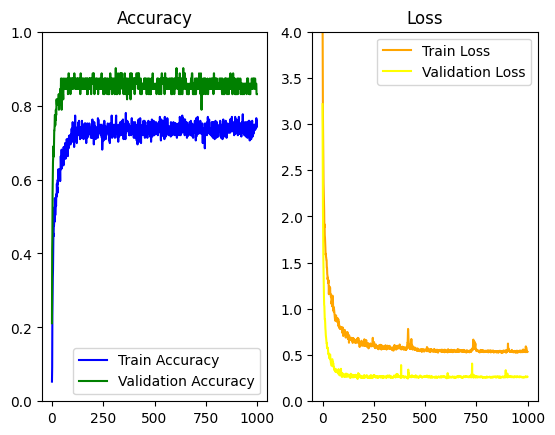

In [ ]:
plot_training_history(history)

In [ ]:
chatbot_test()


User: sebutkan pengertian kuhp
1/1 [==============================] - 0s 45ms/step
Label: qna 9
Chatbot: Istilah tindak pidana berasal dari bahasa Belanda "Strafbaar feit" yang memiliki banyak istilah lain, yaitu delik yang jika disimpulkan kedua istilah tersebut memiliki arti yang sama dengan perbuatan yang dapat/boleh dihukum, peristiwa pidana, perbuatan pidana, dan tindak pidana.

Jadi, tindak pidana merupakan perbuatan yang dilakukan seseoran dengan melakukan suatu kejahatan atau pelanggaran pidana yang merugikan kepentingan orang lain atau merugikan kepentingan umum.
User: apa itu pidana?
1/1 [==============================] - 0s 27ms/step
Label: qna 9
Chatbot: Istilah tindak pidana berasal dari bahasa Belanda "Strafbaar feit" yang memiliki banyak istilah lain, yaitu delik yang jika disimpulkan kedua istilah tersebut memiliki arti yang sama dengan perbuatan yang dapat/boleh dihukum, peristiwa pidana, perbuatan pidana, dan tindak pidana.

Jadi, tindak pidana merupakan perbuatan yan